In [12]:
def legendre(x,n):
    if n==0: return 1
    elif n==1: return x
    else:
        return (2*n+1)/(n+1)*x*legendre(x,n-1)-n*legendre(x,n-2)

In [1]:
import numpy as np

In [5]:
x=np.array([i for i in range(1,21)])
y=np.array([5,6,8,10,12,13,12,10,8,10,8,11,7,9,11,10,9,12,11,6])

In [6]:
f=lambda x,i,j: legendre(x,i)*legendre(x,j)

In [25]:
solve_left=[[sum([f(t,i,j) for t in x]) for j in range(9)] for i in range(9)]
solve_left

[[20,
  210,
  4743.333333333334,
  127260.0,
  3741444.166666667,
  116589847.5,
  3782186845.505556,
  126349060715.9375,
  4316052789000.4365],
 [210,
  2870,
  73080.0,
  2089120.8333333335,
  63941535.0,
  2048649890.272222,
  67821434479.16667,
  2300987797287.078,
  79563274282919.67],
 [4743.333333333334,
  73080.0,
  1988352.2222222225,
  59221271.66666667,
  1864422106.6111114,
  60976510795.27779,
  2050505267659.1968,
  70428930489232.53,
  2459541958305808.0],
 [127260.0,
  2089120.8333333335,
  59221271.66666667,
  1814097722.013889,
  58295673587.08334,
  1936602092918.497,
  65928584023708.695,
  2286988184081170.5,
  8.051979473526014e+16],
 [3741444.166666667,
  63941535.0,
  1864422106.6111114,
  58295673587.08334,
  1902839027983.421,
  63995117927735.266,
  2200320601711699.0,
  7.69515207016129e+16,
  2.7278220933450803e+18],
 [116589847.5,
  2048649890.272222,
  60976510795.27779,
  1936602092918.497,
  63995117927735.266,
  2173699014698601.8,
  7.53498550174972

In [24]:
solve_right=[sum(legendre(x[i],j)*y[i] for i in range(len(x))) for j in range(9)]
solve_right=np.array(solve_right)
solve_right

array([1.88000000e+02, 2.01500000e+03, 4.51223333e+04, 1.19950958e+06,
       3.49795021e+07, 1.08062507e+09, 3.47162377e+10, 1.14730935e+12,
       3.87389549e+13])

In [27]:
s=np.linalg.solve(solve_left, solve_right) 
s

array([ 9.28830442e+00, -3.82488881e+00,  8.12278718e-01,  7.32336017e-02,
       -2.52813873e-02,  2.11025178e-03, -8.11318492e-05,  1.50457120e-06,
       -1.09029102e-08])

In [90]:
F=lambda z: np.array([sum([legendre(l,i)*s[i] for i in range(9)]) for l in z]).reshape((len(z),))

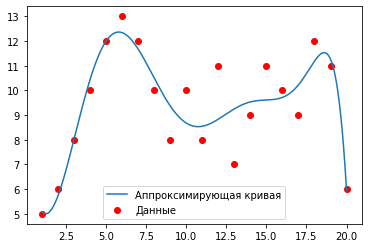

In [93]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(1,20,1000),F(np.linspace(1,20,1000)),label='Аппроксимирующая кривая')
plt.scatter(x,y,label='Данные',color='r')
plt.legend()

In [92]:
F([2])

array([5.75539708])